# NORMAL DISTRIBUTION

***

In [1]:
# Numerical arrays.
import numpy as np

# Plotting.
import matplotlib.pyplot as plt

# Statistics.
import scipy.stats as ss
from scipy.stats import norm #imports normal distribution from scipy

import pandas as pd

# THE BRIEF

** Normal Distribution Notebook:**
- Create a notebook about the normal distribution.
- Define and explain the main concepts.
- Pitch the notebook at your classmates.
- Use visuals like plots to explain concept

The normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean
The formula to describe the normal distribution is shown below:

***

$$ f(x) = \frac{1}{\sqrt{2 \pi \sigma^2 }} e^{-\frac{(x - \mu)^2}{2 \sigma^2}} $$ 

***
where:

x = value of the variable or data being examined and f(x) the probability function
μ = the mean
σ = the standard deviation


reference 1.[Data Science Discovery](https://discovery.cs.illinois.edu/learn/Simulation-and-Distributions/Normal-Distribution/)
 2.[Investopedia](https://www.investopedia.com/terms/n/normaldistribution.asp#toc-the-formula-for-the-normal-distribution).


# Properties of the normal distribution
The mean, median and mode are exactly the same.
The distribution is symmetric about the mean—half the values fall below the mean and half above the mean.

In [2]:
np.random.normal()

1.447574862831229

In [3]:
#testing norm from scipy, find the cumulative distribution function to the left of z-score 1
norm.cdf(1)

0.8413447460685429

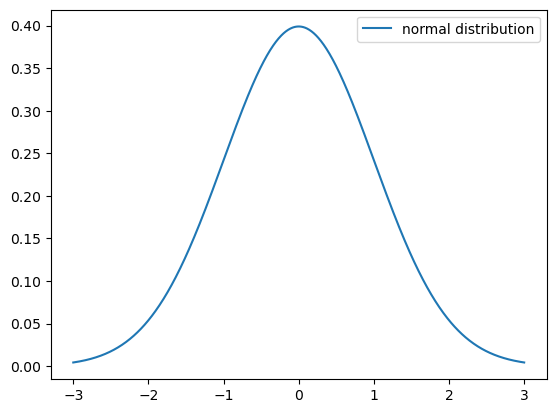

In [4]:
# Set mu and sigma.
mu, sigma = 0.0, 1.0

# Range of x values.
x = np.linspace(-3.0, 3.0, 1000)

# First part, with the square root.
part1 = 1.0 / np.sqrt(2 * np.pi * sigma**2)
# Second part, with the e.
part2 = np.exp(-((x - mu)**2 / (2 * sigma**2)))
# The output is the product.
y = part1 * part2

# Plot x and y.
plt.plot(x, y, label='normal distribution')


plt.legend();

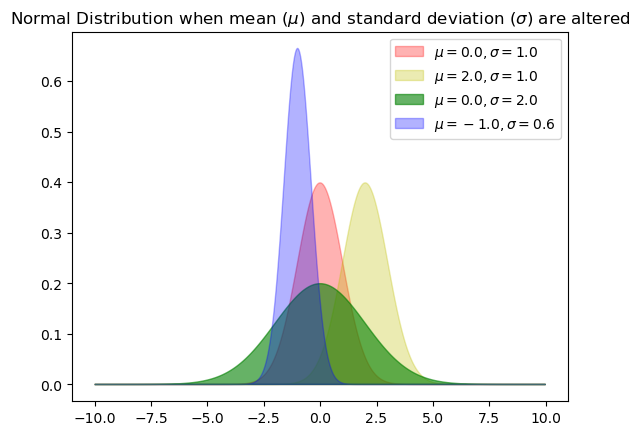

In [5]:
# from https://web.microsoftstream.com/video/962405f9-e723-47b5-88d9-045b0bdd2999?referrer=https:%2F%2Fvlegalwaymayo.atu.ie%2F

x = np.linspace(-10,10.0,1000)

plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=1.0), label="$\mu = 0.0, \sigma = 1.0$", c='r', alpha=0.3, lw=1.0) 
plt.fill(x, ss.norm.pdf(x, loc= 2.0, scale=1.0), label="$\mu = 2.0, \sigma = 1.0$", c='y', alpha=0.3, lw=1.0)
plt.fill(x, ss.norm.pdf(x, loc= 0.0, scale=2.0), label="$\mu = 0.0, \sigma = 2.0$", c='g', alpha=0.6, lw=1.0)
plt.fill(x, ss.norm.pdf(x, loc= -1.0, scale=0.6), label="$\mu = -1.0, \sigma = 0.6$", c='b', alpha=0.3, lw=1.0)

plt.title("Normal Distribution when mean ($\mu$) and standard deviation ($\sigma$) are altered")
plt.legend();

The Normal Distribution is a Bell shaped curve in which the majority of the values centre around the mean and depending on the standard deviation the values fall away with a steeper gradient for smaller standard deviations (eg. the blue curve in the above example which has a standard deviation of 0.6) or a more gradual gradient when the standard deviation is larger (the green curve in the above example where the standard deviation is 2.0

# Real world example. The distribution of height of a random sample of people in Ireland


Using the kaggle notebook here https://www.kaggle.com/code/mysha1rysh/gaussian-normal-distribution/notebook. I will create a graph of heights for a sample of the Irish population using data from the following website
https://ncdrisc.org/data-downloads-height.html

In [6]:
#import dataset
heightIreland = pd.read_csv("NCD_RisC_Lancet_2020_height_child_adolescent_Ireland.csv")

In [7]:
#check data
heightIreland.head()

,Country,Sex,Year,Age group,Mean height,Mean height lower 95% uncertainty interval,Mean height upper 95% uncertainty interval,Mean height standard error
0,Ireland,Boys,1985,5,113.493644,110.655872,116.403132,1.467262
1,Ireland,Boys,1985,6,119.694286,117.029381,122.417905,1.390998
2,Ireland,Boys,1985,7,125.458419,122.836029,128.142708,1.357360
3,Ireland,Boys,1985,8,130.917328,128.347870,133.583246,1.345508
4,Ireland,Boys,1985,9,136.192909,133.564878,138.831020,1.347336


In [8]:
#check info about dataset
heightIreland.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 8 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Country                                     1050 non-null   object 
 1   Sex                                         1050 non-null   object 
 2   Year                                        1050 non-null   int64  
 3   Age group                                   1050 non-null   int64  
 4   Mean height                                 1050 non-null   float64
 5   Mean height lower 95% uncertainty interval  1050 non-null   float64
 6   Mean height upper 95% uncertainty interval  1050 non-null   float64
 7   Mean height standard error                  1050 non-null   float64
dtypes: float64(4), int64(2), object(2)
memory usage: 65.8+ KB


In [9]:
#from the above df select the data for 19 year old males in 2019
df= heightIreland
# Select Row No. 524
print(df.iloc[524])

Country                                          Ireland
Sex                                                 Boys
Year                                                2019
Age group                                             19
Mean height                                   179.039383
Mean height lower 95% uncertainty interval    176.602772
Mean height upper 95% uncertainty interval     181.52086
Mean height standard error                       1.24933
Name: 524, dtype: object


Unfortunately I cannot find a dataset that has actual measured values for heights in Ireland. Just these averaged data. I will have to use randomseed to simulate the data


In [26]:
# Create fake data using the mean and standard error ref https://rowannicholls.github.io/python/statistics/confidence_intervals.html
mean =  179.039383
standard_error =  1.24933
x = np.random.normal(mean, standard_error, sample_size) # normal dirtribution

print([f'{x:.1f}' for x in sorted(x)])

['175.4', '176.0', '176.0', '176.1', '176.2', '176.4', '176.4', '176.5', '176.5', '176.5', '176.6', '176.7', '176.8', '176.8', '176.8', '176.8', '176.9', '176.9', '176.9', '176.9', '176.9', '176.9', '177.0', '177.0', '177.0', '177.0', '177.0', '177.0', '177.0', '177.1', '177.1', '177.1', '177.2', '177.2', '177.2', '177.2', '177.2', '177.2', '177.2', '177.3', '177.3', '177.3', '177.3', '177.3', '177.3', '177.4', '177.4', '177.4', '177.5', '177.5', '177.5', '177.5', '177.5', '177.5', '177.5', '177.5', '177.5', '177.5', '177.5', '177.6', '177.6', '177.6', '177.6', '177.6', '177.6', '177.6', '177.6', '177.6', '177.6', '177.6', '177.6', '177.6', '177.7', '177.7', '177.7', '177.7', '177.7', '177.7', '177.7', '177.7', '177.7', '177.8', '177.8', '177.8', '177.8', '177.8', '177.8', '177.8', '177.8', '177.9', '177.9', '177.9', '177.9', '177.9', '177.9', '177.9', '177.9', '177.9', '177.9', '177.9', '178.0', '178.0', '178.0', '178.0', '178.0', '178.0', '178.0', '178.0', '178.0', '178.0', '178.0', 

In [30]:
mean = np.mean(x)
s = np.std(x, ddof=1)  # Use ddof=1 to get the sample standard deviation

print(rf'Sample mean = {mean:4.1f}; sample standard deviation = {s:3.1f}')

Sample mean = 179.1; sample standard deviation = 1.3


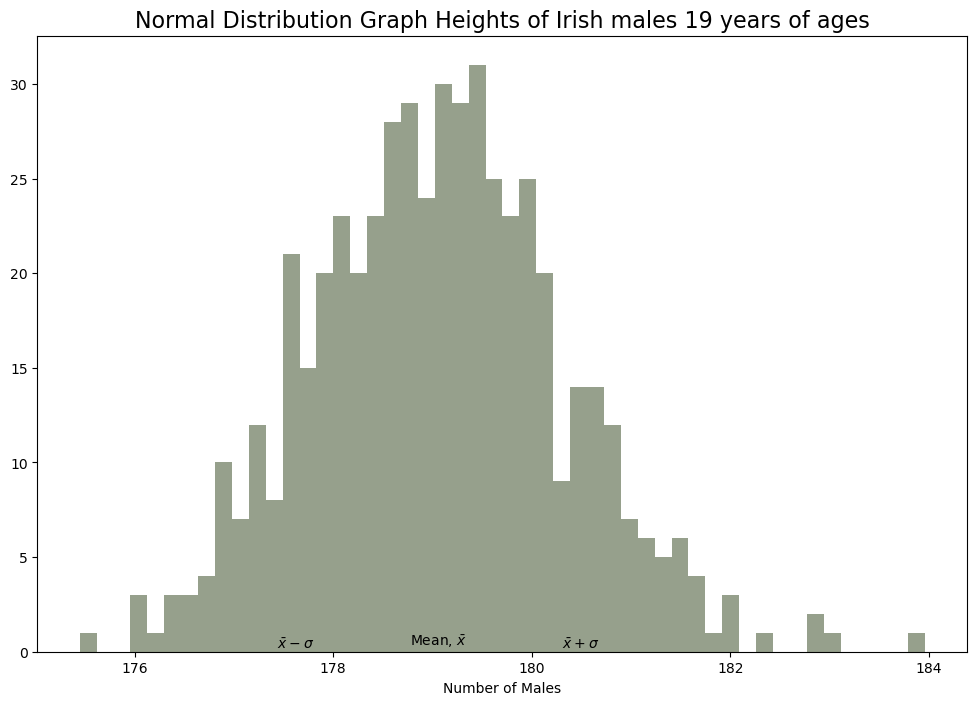

In [40]:
plt.figure(figsize=(12,8))
plt.hist(x, bins= 50, alpha=0.6, color='#51613f')

plt.xlabel('Heights')
plt.xlabel('Number of Males')

plt.title('Normal Distribution Graph Heights of Irish males 19 years of ages', fontsize=16)

# Text
plt.text(mean - standard_error, norm.pdf(mean - standard_error, mean, standard_error) * 1.04, r'$\bar x - \sigma$', ha='right')
plt.text(mean, norm.pdf(mean, mean, standard_error) * 1.02, r'Mean, $\bar x$', ha='center')
plt.text(mean + standard_error, norm.pdf(mean + standard_error, mean, standard_error) * 1.04, r'$\bar x + \sigma$', ha='left')
# Finish
plt.show()
plt.close()



